In [1]:
# Hyper parameter tuning using hyperopt
# Written by SL Sep 2020
# Reference https://medium.com/analytics-vidhya/hyperparameter-tuning-hyperopt-bayesian-optimization-for-xgboost-and-neural-network-8aedf278a1c9

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing, modelling and evaluating
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_squared_error
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
import xgboost as xgb

## Hyperopt modules
# import hyperopt
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, STATUS_RUNNING

# Dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target
# y -= y.mean() # substract mean

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=0)

In [3]:
X_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

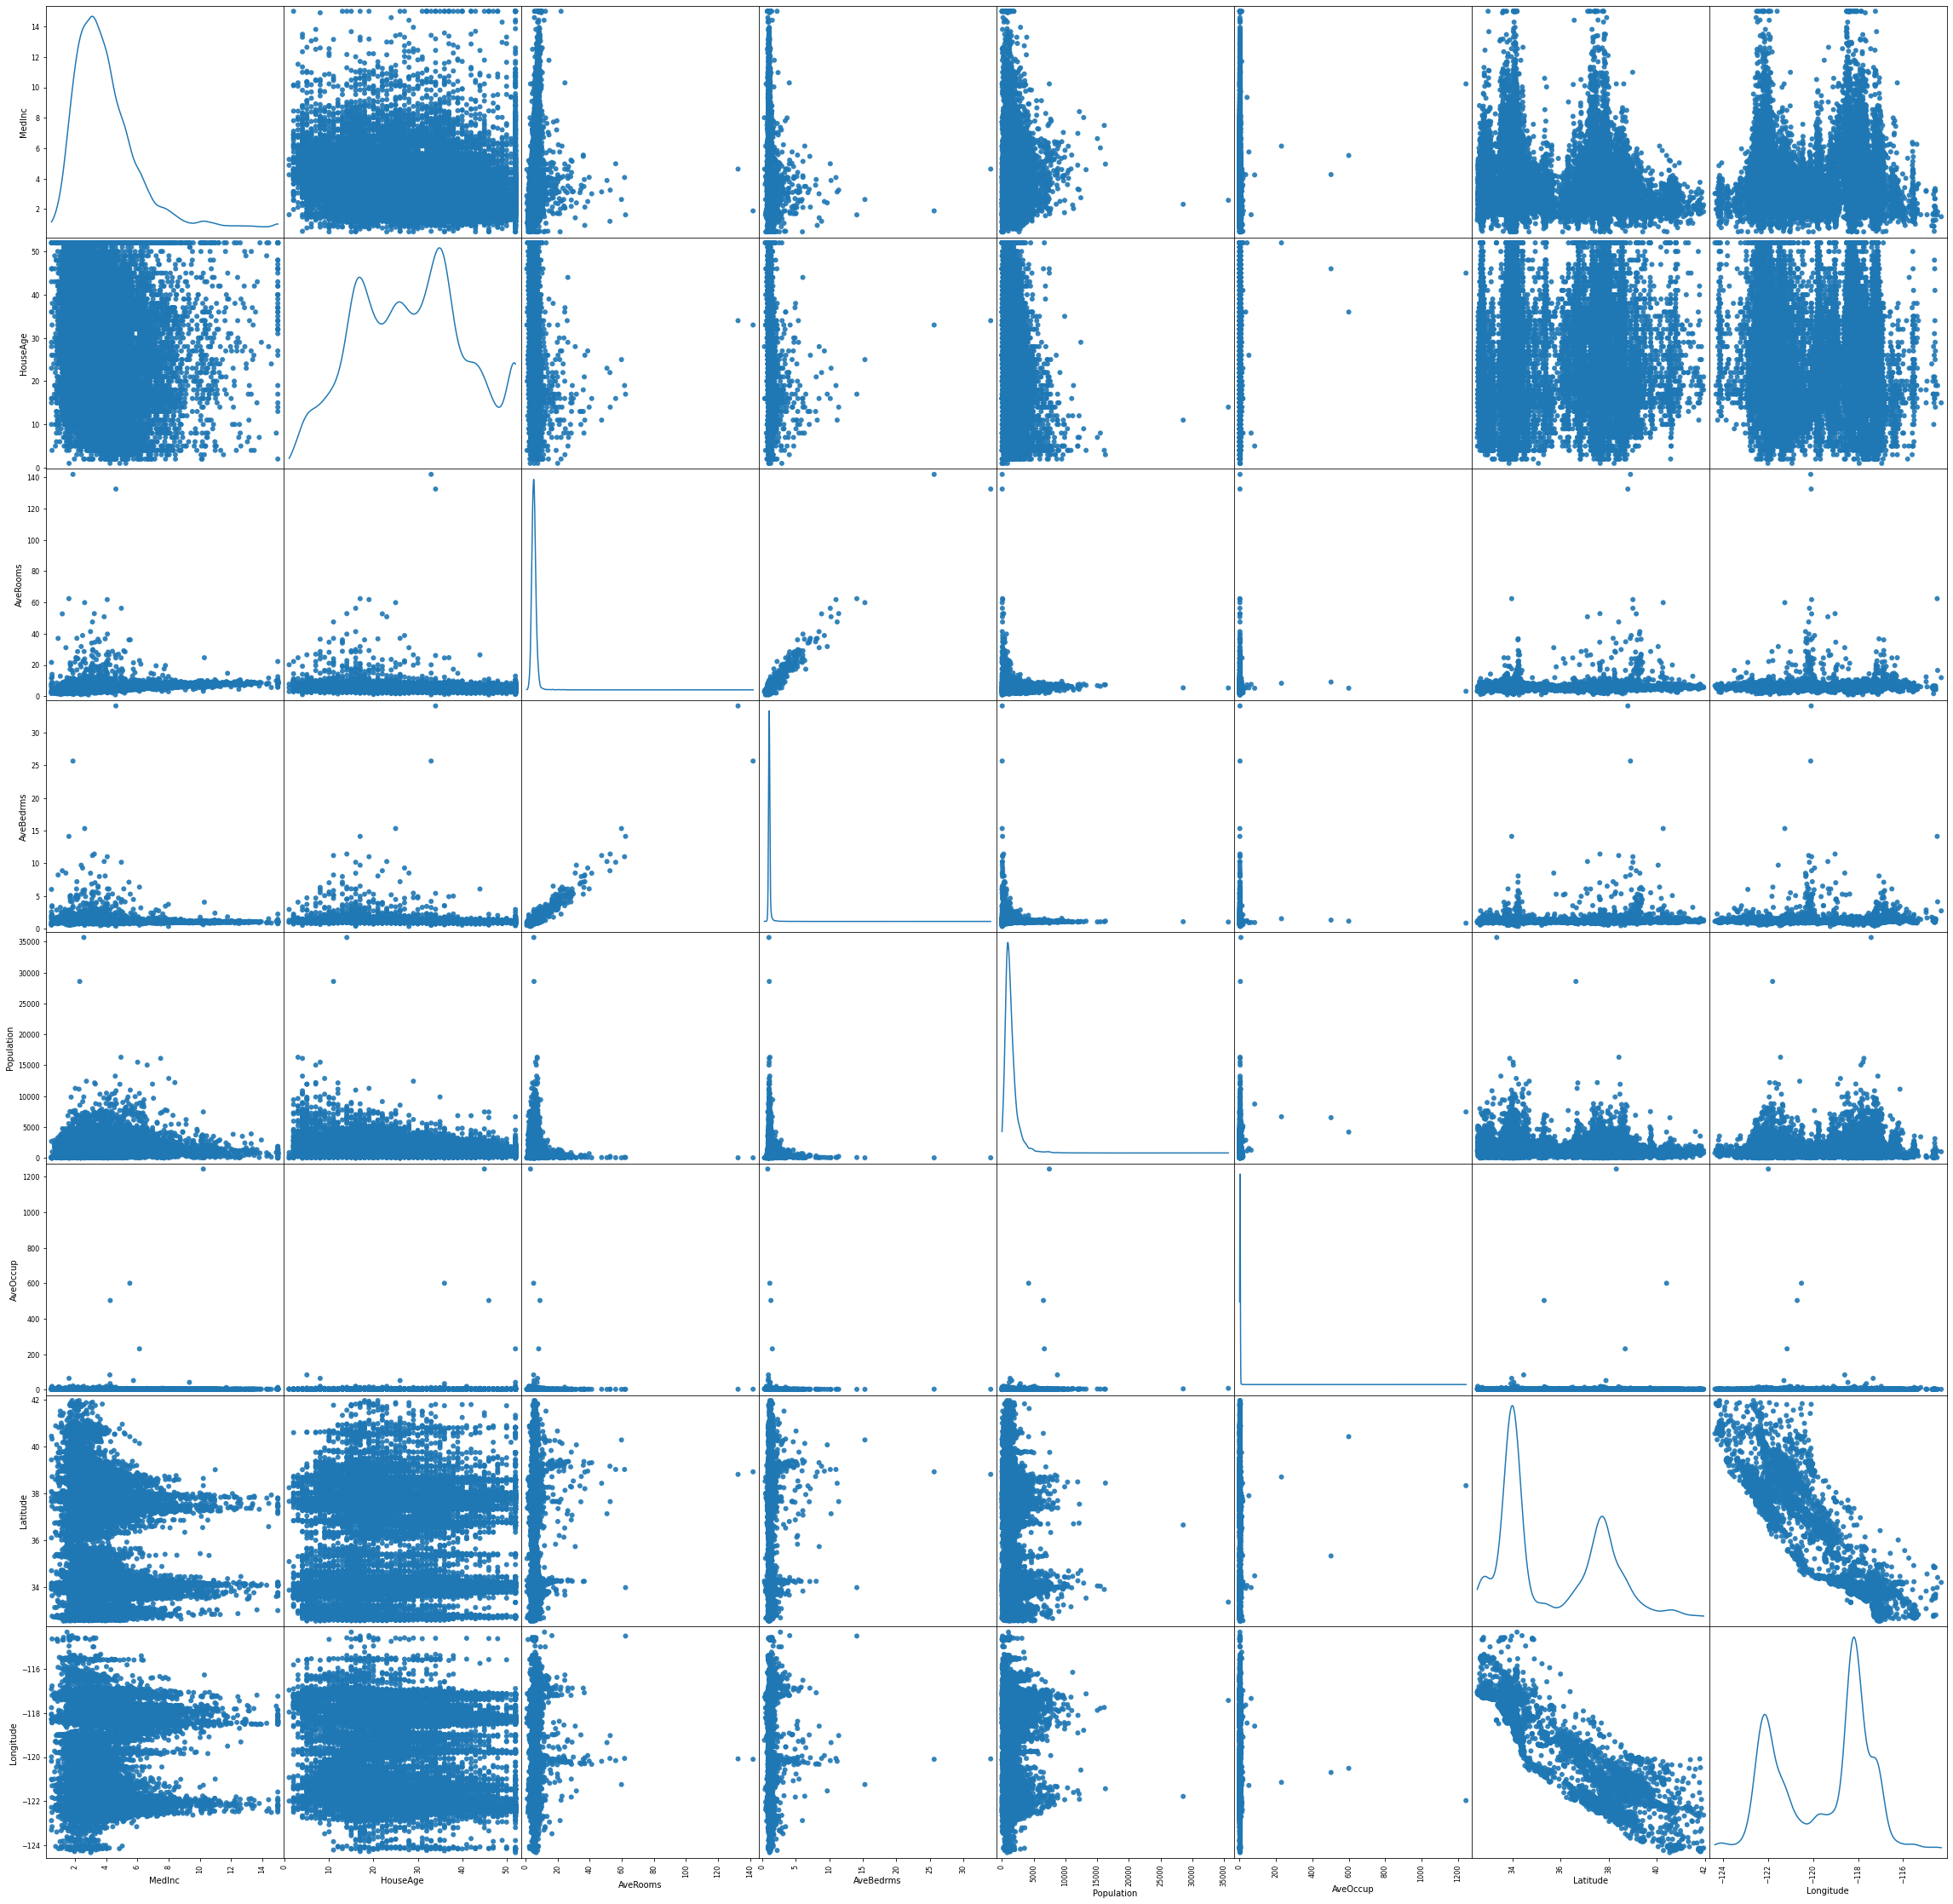

In [4]:
fig = plt.figure()
pd.plotting.scatter_matrix(X,figsize =(40,40),alpha=0.9,diagonal="kde",marker="o");
# plt.xticks(fontsize = 20)
# plt.yticks(fontsize = 20)
#plt.savefig("scatter_matrix.jpg", dpi = 700)

In [5]:
space={'max_depth': hp.quniform("max_depth", 3, 12, 1),
        'gamma': hp.uniform ('gamma', 0.0000001,3),
        'reg_alpha' : hp.quniform('reg_alpha', 0,10,1),
        'reg_lambda' : hp.quniform('reg_lambda', 0,10,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.3,1),
        'min_child_weight' : hp.quniform('min_child_weight', 100, 2000, 1),
        'n_estimators': 200,
       'learning_rate': hp.uniform('learning_rate', 0.001, 0.2),
       'subsample': hp.uniform ('subsample', 0.3,1),
       }

In [6]:
# Classifier:
def hyperparameter_tuning(space):
    model = xgb.XGBRegressor(n_estimators =space['n_estimators'],
                              max_depth = int(space['max_depth']),
                              gamma = space['gamma'],
                              reg_alpha = int(space['reg_alpha']),
                              min_child_weight=int(space['min_child_weight']),
                              learning_rate=space['learning_rate'],
                              colsample_bytree=space['colsample_bytree'])
    evaluation = [( X_train, y_train), ( X_test, y_test)]
   
#   Classification
#   model = xgb.XGBClassifier(n_estimators =space['n_estimators'],
#                               max_depth = int(space['max_depth']),
#                               gamma = space['gamma'],
#                               reg_alpha = int(space['reg_alpha']),
#                               min_child_weight=int(space['min_child_weight']),
#                               learning_rate=space['learning_rate'],
#                               colsample_bytree=space['colsample_bytree'])
#     evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    model.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="rmse",
            early_stopping_rounds=20,verbose=False)

    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print ("SCORE:", mse)
    #change the metric if you like
    return {'loss': mse, 'status': STATUS_OK, 'model': model}


In [7]:
trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=10,
            trials=trials)

print (best)

SCORE:                                                
0.30754974110960454                                   
SCORE:                                                                           
0.26261580553493846                                                              
SCORE:                                                                           
0.29393719422203                                                                 
SCORE:                                                                           
0.3068254075013297                                                               
SCORE:                                                                           
0.2856562246501727                                                               
SCORE:                                                                           
0.2762123304233693                                                               
SCORE:                                                                

In [8]:
import sklearn
import hyperopt
print('The sklearn version is {}'.format(sklearn.__version__))
print('The hyperopt version is {}'.format(hyperopt.__version__))

The sklearn version is 0.23.2
The hyperopt version is 0.2.5
